In [2]:
import pandas as pd

# ==========================
# 1) Load your LinkedIn dataset
# ==========================
file_path = r"C:\Users\Georges Ghosn\Desktop\linkedin_mental_health_posts.csv"
df = pd.read_csv(file_path)

# ==========================
# 2) Remove Duplicates
# ==========================
df_cleaned = df.drop_duplicates(subset='content')

# ==========================
# 3) Add a column: number of words
# ==========================
df_cleaned['content_length'] = df_cleaned['content'].apply(lambda x: len(str(x).split()))

# ==========================
# 4) Remove very short posts (less than 5 words)
# ==========================
df_cleaned = df_cleaned[df_cleaned['content_length'] >= 5]

# ==========================
# 5) Save cleaned dataset
# ==========================
output_path = r"C:\Users\Georges Ghosn\Desktop\linkedin_mental_health100_posts_cleaned.csv"
df_cleaned.to_csv(output_path, index=False, encoding='utf-8')

print(f"✅ Cleaned LinkedIn dataset saved to {output_path}")
print(f"Remaining posts: {len(df_cleaned)}")


✅ Cleaned LinkedIn dataset saved to C:\Users\Georges Ghosn\Desktop\linkedin_mental_health100_posts_cleaned.csv
Remaining posts: 99


In [21]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import emoji

# ==========================
# Import Libraries
# ==========================
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# ==========================
# Load Cleaned Dataset
# ==========================
file_path = r"C:\Users\Georges Ghosn\Desktop\linkedin_mental_health100_posts_cleaned.csv"
df = pd.read_csv(file_path)

# ==========================
# Extraction Functions
# ==========================
def extract_emojis(text):
    return [c for c in str(text) if c in emoji.EMOJI_DATA]

def extract_hashtags(text):
    return re.findall(r'#(\w+)', str(text))

def extract_mentions(text):
    return re.findall(r'@(\w+)', str(text))

df['emojis'] = df['content'].apply(extract_emojis)
df['hashtags'] = df['content'].apply(extract_hashtags)
df['mentions'] = df['content'].apply(extract_mentions)

# ==========================
# Cleaning Function
# ==========================
def clean_text(text):
    text = re.sub(r'RT', '', str(text))
    text = re.sub(r'&amp;', '&', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(r'[?!.;:,#@-]', '', text)
    text = re.sub(r'<u\+.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.lower()

df['cleaned_text'] = df['content'].apply(clean_text)

# ==========================
# Tokenization
# ==========================
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

# ==========================
# Stopword Removal
# ==========================
stop_words = set(stopwords.words('english'))
df['tokens_no_stopwords'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Extend custom stopwords list
custom_stopwords = set([
    'mental', 'health', 'im', 'youre', 'one', 'even', 'like', 
    'see', 'going', 'really', 'look', 'may', 'want', 'cant', 'thats', 'keep', 'get', 'go', 'dont', 'someone','new','make','isnt','lets','people','take','hashtag','know','day','way','things','ive','time'
])

df['tokens_no_stopwords'] = df['tokens_no_stopwords'].apply(
    lambda tokens: [word for word in tokens if word not in custom_stopwords]
)

# ==========================
# Save Prepared Data
# ==========================
output_path = r"C:\Users\Georges Ghosn\Desktop\linkedin_mental_health100_posts_prepared.csv"
df.to_csv(output_path, index=False, encoding='utf-8')

print(f"✅ Preprocessed LinkedIn dataset saved to: {output_path}")
print(df[['content', 'cleaned_text', 'tokens_no_stopwords']].head())


✅ Preprocessed LinkedIn dataset saved to: C:\Users\Georges Ghosn\Desktop\linkedin_mental_health100_posts_prepared.csv
                                             content  \
0  We need to talk about a fundamental misunderst...   
1  Students & professionals often battle stress, ...   
2  Political stress is real, and it’s taking a to...   
3  A toxic workplace doesn’t just drain your ener...   
4  🚨 The Hidden Epidemic: Why Mental Health Shoul...   

                                        cleaned_text  \
0  we need to talk about a fundamental misunderst...   
1  students  professionals often battle stress an...   
2  political stress is real and its taking a toll...   
3  a toxic workplace doesnt just drain your energ...   
4   the hidden epidemic why mental health should ...   

                                 tokens_no_stopwords  
0  [need, talk, fundamental, misunderstanding, co...  
1  [students, professionals, often, battle, stres...  
2  [political, stress, real, taking, toll, 

[nltk_data] Downloading package punkt to C:\Users\Georges
[nltk_data]     Ghosn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Georges
[nltk_data]     Ghosn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Georges
[nltk_data]     Ghosn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Georges Ghosn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


🔝 Top 20 frequent words in LinkedIn posts:
[('work', 51), ('life', 40), ('care', 35), ('support', 33), ('wellbeing', 31), ('help', 30), ('burnout', 29), ('stress', 26), ('feel', 25), ('need', 24), ('ai', 24), ('job', 23), ('talk', 22), ('every', 19), ('workplace', 18), ('something', 18), ('often', 18), ('still', 18), ('change', 18), ('career', 18)]


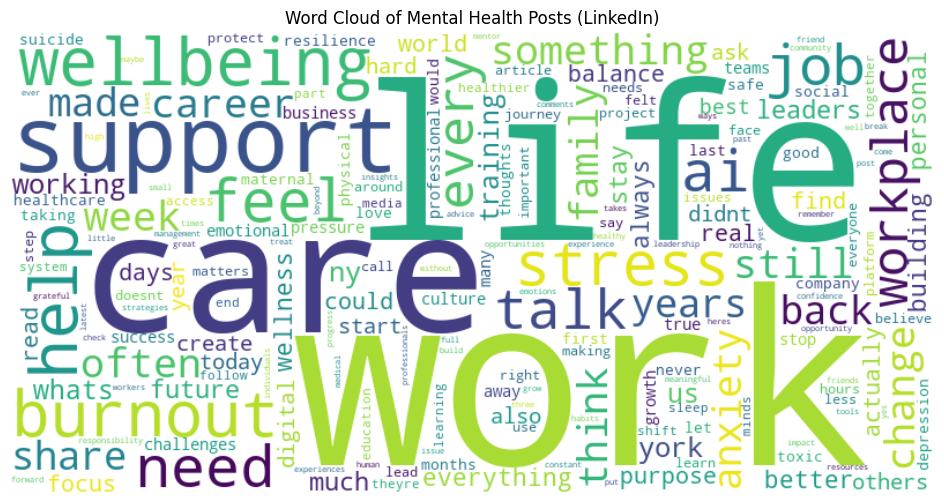

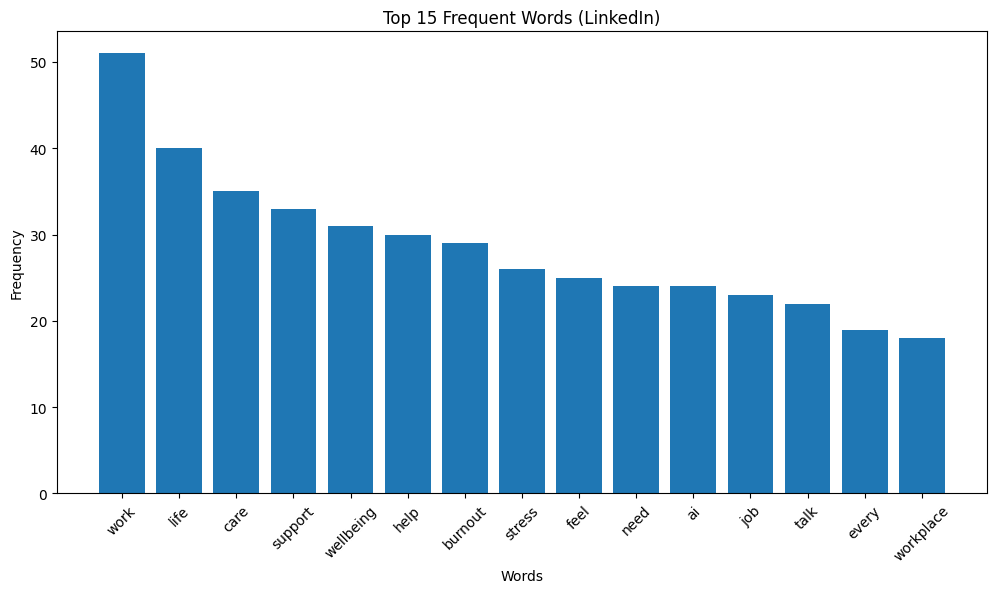

In [22]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ==========================
# 1) Flatten the token list
# ==========================
all_tokens = [word for tokens in df['tokens_no_stopwords'] for word in tokens]

# ==========================
# 2) Count word frequency
# ==========================
word_freq = Counter(all_tokens)

# Show top 20 most common words
print("🔝 Top 20 frequent words in LinkedIn posts:")
print(word_freq.most_common(20))

# ==========================
# 3) Plot Word Cloud
# ==========================
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Mental Health Posts (LinkedIn)")
plt.show()

# ==========================
# 4) Plot Bar Chart (Optional)
# ==========================
top_words = dict(word_freq.most_common(15))
plt.figure(figsize=(12, 6))
plt.bar(top_words.keys(), top_words.values())
plt.xticks(rotation=45)
plt.title("Top 15 Frequent Words (LinkedIn)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [2]:
import pandas as pd

# ==========================
# Load original LinkedIn dataset
# ==========================
file_path = r"C:\Users\Georges Ghosn\Desktop\linkedin_mental_health_posts.csv"
df = pd.read_csv(file_path)

# ==========================
# Remove Duplicates
# ==========================
df_cleaned = df.drop_duplicates(subset='content')

# ==========================
# Add a column: number of words
# ==========================
df_cleaned['content_length'] = df_cleaned['content'].apply(lambda x: len(str(x).split()))

# ==========================
# Remove very short posts (less than 5 words)
# ==========================
df_cleaned = df_cleaned[df_cleaned['content_length'] >= 5]

# ==========================
# Save cleaned dataset
# ==========================
output_path = r"C:\Users\Georges Ghosn\Desktop\linkedin_mental_health_posts_cleaned.csv"
df_cleaned.to_csv(output_path, index=False, encoding='utf-8')

print(f"✅ Cleaned LinkedIn dataset saved to {output_path}")
print(f"Remaining posts: {len(df_cleaned)}")


✅ Cleaned LinkedIn dataset saved to C:\Users\Georges Ghosn\Desktop\linkedin_mental_health_posts_cleaned.csv
Remaining posts: 99


In [3]:
from textblob import TextBlob
import pandas as pd

# ==========================
# Load Cleaned LinkedIn Dataset
# ==========================
file_path = r"C:\Users\Georges Ghosn\Desktop\linkedin_mental_health_posts_cleaned.csv"
df = pd.read_csv(file_path)

# ==========================
# Sentiment Analysis Function
# ==========================
def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return pd.Series([polarity, sentiment])

# ==========================
# Apply Sentiment Analysis
# ==========================
df[['polarity', 'sentiment']] = df['content'].apply(get_sentiment)

# ==========================
# Sentiment Summary
# ==========================
sentiment_counts = df['sentiment'].value_counts()
print("✅ Sentiment Summary:")
print(sentiment_counts)

# ==========================
# Save Dataset with Sentiment
# ==========================
output_path = r"C:\Users\Georges Ghosn\Desktop\linkedin_mental_health_posts_sentiment.csv"
df.to_csv(output_path, index=False, encoding='utf-8')
print(f"✅ Sentiment analysis saved to: {output_path}")


✅ Sentiment Summary:
sentiment
Positive    73
Negative    23
Neutral      3
Name: count, dtype: int64
✅ Sentiment analysis saved to: C:\Users\Georges Ghosn\Desktop\linkedin_mental_health_posts_sentiment.csv


C:\Users\Georges Ghosn\AppData\Local\Temp\ipykernel_23000\3974273535.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


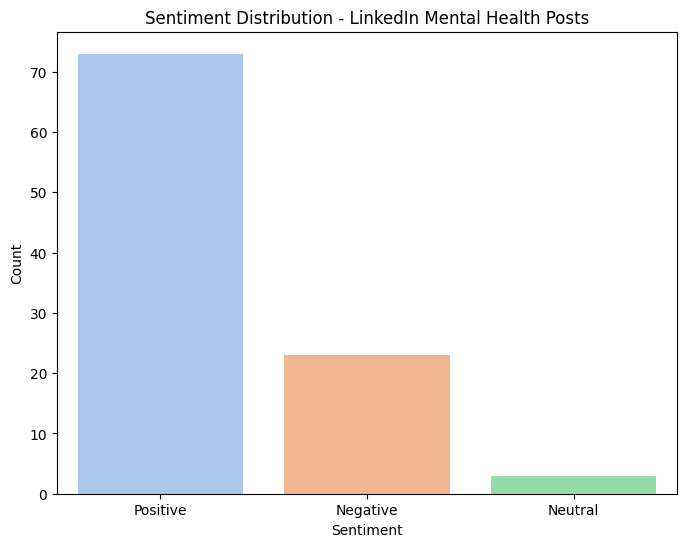

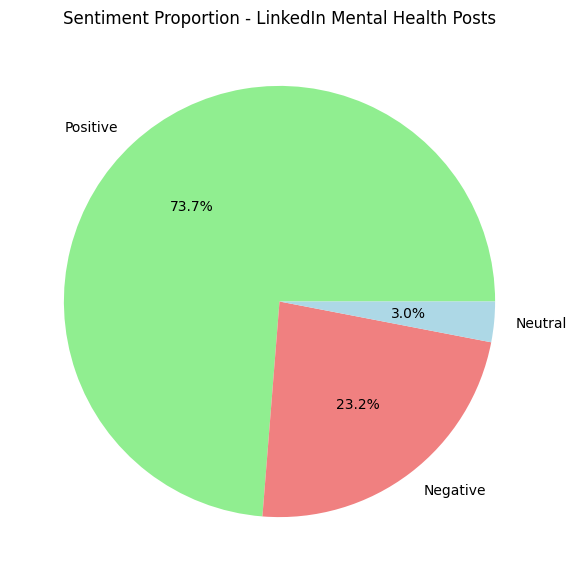

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# Load LinkedIn Dataset
# ==========================
file_path = r"C:\Users\Georges Ghosn\Desktop\linkedin_mental_health_posts_sentiment.csv"
df = pd.read_csv(file_path)

# ==========================
# Plot Sentiment Bar Chart
# ==========================
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution - LinkedIn Mental Health Posts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# ==========================
# Plot Sentiment Pie Chart
# ==========================
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title("Sentiment Proportion - LinkedIn Mental Health Posts")
plt.show()



🔝 Top 10 TF-IDF Words in LinkedIn:
health    0.246472
mental    0.234743
work      0.125999
just      0.122295
life      0.108706
people    0.103348
time      0.098534
care      0.093449
like      0.092171
let       0.088939
dtype: float64


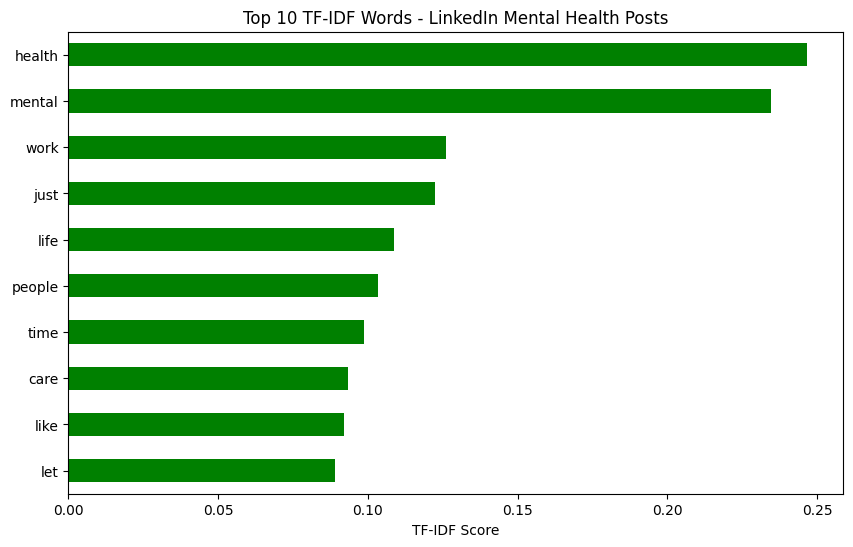

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# ==========================
# Load LinkedIn Dataset
# ==========================
linkedin_path = r"C:\Users\Georges Ghosn\Desktop\linkedin_mental_health_posts_cleaned.csv"
linkedin_df = pd.read_csv(linkedin_path)

# ==========================
# TF-IDF Vectorizer
# ==========================
tfidf_vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(linkedin_df['content'])

# ==========================
# Get TF-IDF Scores
# ==========================
tfidf_scores = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_mean = tfidf_scores.mean().sort_values(ascending=False)

print("\n🔝 Top 10 TF-IDF Words in LinkedIn:")
print(tfidf_mean.head(10))

# ==========================
# Plot
# ==========================
plt.figure(figsize=(10, 6))
tfidf_mean.head(10).plot(kind='barh', color='green')
plt.gca().invert_yaxis()
plt.title("Top 10 TF-IDF Words - LinkedIn Mental Health Posts")
plt.xlabel("TF-IDF Score")
plt.show()
